# Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial - Inteligencia Artificial para Juegos (Game IA) - Sesión 5 - Tarea


<img src='https://escuela.pucp.edu.pe/gobierno/wp-content/uploads/2015/04/logo-pucp-full-color-300x88.png' width=200px>


Dr. Edwin Villanueva, Ing. Daniel Saromo

11/12/2021

<font color='orange'>Creación de modelos de ML supervisado para Behavioral Cloning en el entorno Pacman UCB 3.6</font>

En este notebook se implementan códigos que permiten la generación de la arquitectura y del modelo de Behavioral Cloning, para ser usados en el entorno Pacman UCB 3.6. 

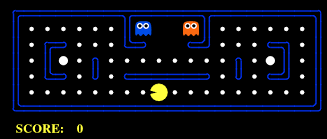

El conjunto de datos para trabajar el proyecto contiene 5 clases a predecir (0: `Stop`, 1: `East`, 2: `North`, 3: `West`, y 4: `South`).

Donde cada clase se refiere a una acción a tomar utilizando información de **10 features** extraidos de un `GameState` del entorno de juego Pacman UCB:

Features:
1. 'posx_g1_fromPacman' **('g1x')**
2. 'posy_g1_fromPacman' **('g1y')**
3. 'posx_g2_fromPacman' **('g2x')**
4. 'posy_g2_fromPacman' **('g2y')**
5. 'capsulas_restantes' **('caps')**
6. 'manhattan_dist_toClosest_ghost' **('dist_ghost')**
7. 'manhattan_dist_toClosest_caps' **('dist_caps')** 
8. 'mean_manhDist_5_closests_dots' **('dist_5dots')** 
9. **'score'**
10.'cant_scared_ghosts' **('scared')**

Target:
11. **'action'** 
 

**TAREA (1.5 puntos en total por este notebook y los archivos a generarse con el mismo):** 

Completar los campos de código requeridos y aplicar la metodología de Behavioral Cloning para generar un archivo con un modelo de ML. Este archivo deberá poder ser utilizado para controlar un agente Pacman en el entorno de Pacman UCB 3.6.

<font color='red'>Se solicita que el accuracy mínimo de su modelo de inferencia usado en el entorno de Pacman tenga un **accuracy mayor a 50%**.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio5_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA.

## Verificar que se tenga todo el software de ML instalado

In [19]:
# version de Python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# keras
from tensorflow import keras
print('keras: {}'.format(keras.__version__))

import pickle


Python: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]
scipy: 1.6.3
numpy: 1.20.3
matplotlib: 3.4.2
pandas: 1.2.5
sklearn: 0.24.2
keras: 2.2.4-tf


## Paso 1: Cargar e inspeccionar los datos

### 1.1) Primero hay que importar todas las librerias y modulos que se usará

In [30]:
# Librerias base que se usaran
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # para validacion y selecion de modelos 
from sklearn.model_selection import cross_val_score     # para validacion y selecion de modelos 
from sklearn.model_selection import KFold               # para generar k-folds para validacion y selecion de modelos  
from sklearn.preprocessing import LabelEncoder          # para reetiquetar labels con valores numericos
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score  # para manejar metricas de desempeño 
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion

# Librerias de diferentes Modelos de ML
from tensorflow.keras.models import Sequential   # Para crear holders de Redes neuronales
from tensorflow.keras.layers import Dense        # Para crear capas de Redes neuronales  fully-connected
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.utils import np_utils
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.svm import SVC   # para modelos SVM
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Puede importar otras librerías, si es que así lo requiere.

### 1.2) Cargar el dataset

In [ ]:
# Puede utilizar esta celda para traer los archivos de su disco en google drive. Sino, los puede subir manualmente en la ventana lateral izquierda.
#from google.colab import drive
#drive.mount('/content/drive')

In [31]:
# DATASET CON APROX 190000 REGISTROS
url = "datosRecolectadosTotal.csv"

names = ['g1x', 'g1y','g2x','g2y','caps','dist_ghost','dist_caps','dist_5dots','score','scared','action']

dataset = pandas.read_csv(url , names=names)

### 1.3) Inspeccionar los datos 

In [32]:
dataset

,g1x,g1y,g2x,g2y,caps,dist_ghost,dist_caps,dist_5dots,score,scared,action
0,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
1,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
2,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
3,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.0,-1.0,0.0,0.0
4,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
72427,-9.0,1.0,0.0,-1.0,1.0,1.0,10.0,3.0,816.0,0.0,2.0
72428,-9.0,1.0,0.0,-1.0,1.0,1.0,10.0,3.0,816.0,0.0,2.0
72429,-8.0,0.0,0.0,-1.0,1.0,1.0,11.0,3.0,825.0,0.0,0.0
72430,-8.0,0.0,0.0,-1.0,1.0,1.0,11.0,3.0,825.0,0.0,0.0


In [33]:
# descripcion estadistica
dataset.describe()

,g1x,g1y,g2x,g2y,caps,dist_ghost,dist_caps,dist_5dots,score,scared,action
count,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000
mean,-0.057765,0.543185,0.343398,0.649685,1.096366,6.989052,13.100743,3.525003,488.864549,0.628369,2.109123
std,7.428298,3.893380,7.473410,3.861363,0.753480,3.422821,6.225305,2.285925,342.120392,0.867357,1.280855
min,-17.000000,-8.000000,-17.000000,-8.000000,0.000000,1.000000,1.000000,1.000000,-16.000000,0.000000,0.000000
25%,-5.000000,-2.000000,-5.000000,-2.000000,1.000000,4.000000,8.000000,2.000000,194.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,12.000000,3.000000,463.000000,0.000000,2.000000
75%,5.000000,4.000000,6.000000,4.000000,2.000000,9.000000,20.000000,4.000000,742.000000,2.000000,3.000000
max,17.000000,8.000000,17.000000,8.000000,2.000000,23.000000,25.000000,20.000000,1587.000000,2.000000,4.000000


In [34]:
# distribucion de clases
print(dataset.groupby('action').size())

action
0.0     8319
1.0    18556
2.0    14840
3.0    18336
4.0    12381
dtype: int64


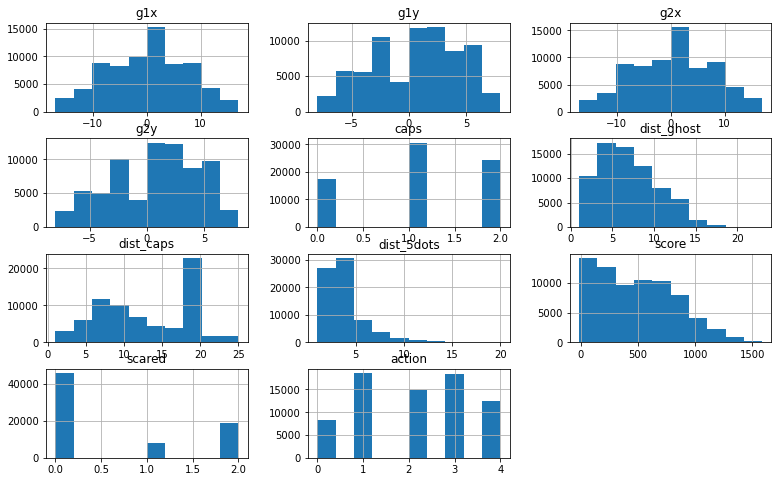

<Figure size 432x288 with 0 Axes>

In [37]:
# histogramas
dataset.hist(figsize=(13,8))
plt.show()
plt.tight_layout();

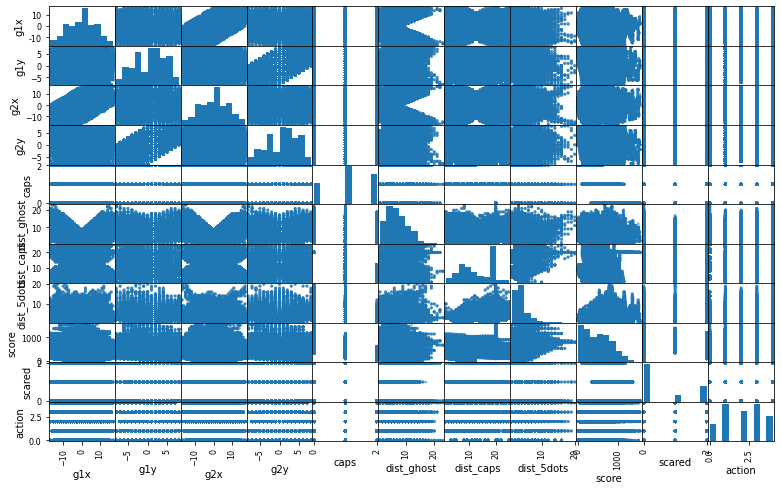

In [38]:
# Matriz scatter plot para ver correlaciones entre atributos
scatter_matrix(dataset, figsize=(13,8))
plt.show()

## Paso 2: Pre-procesar datos y crear modelos

### 2.1) Separa features y etiquetas y codifica etiquetas con numeros 

In [39]:
array = dataset.values
array

array([[ -1.,   4.,   2., ...,   0.,   0.,   0.],
       [ -1.,   4.,   2., ...,   0.,   0.,   0.],
       [ -1.,   4.,   2., ...,   0.,   0.,   0.],
       ...,
       [ -8.,   0.,   0., ..., 825.,   0.,   0.],
       [ -8.,   0.,   0., ..., 825.,   0.,   0.],
       [ -8.,   0.,   0., ..., 825.,   0.,   0.]])

Convertimos el DataFrame a un numpy array y luego normalizamos los datos:

In [40]:
dataset

,g1x,g1y,g2x,g2y,caps,dist_ghost,dist_caps,dist_5dots,score,scared,action
0,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
1,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
2,-1.0,4.0,2.0,4.0,2.0,5.0,9.0,2.0,0.0,0.0,0.0
3,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.0,-1.0,0.0,0.0
4,0.0,4.0,1.0,4.0,2.0,4.0,9.0,2.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
72427,-9.0,1.0,0.0,-1.0,1.0,1.0,10.0,3.0,816.0,0.0,2.0
72428,-9.0,1.0,0.0,-1.0,1.0,1.0,10.0,3.0,816.0,0.0,2.0
72429,-8.0,0.0,0.0,-1.0,1.0,1.0,11.0,3.0,825.0,0.0,0.0
72430,-8.0,0.0,0.0,-1.0,1.0,1.0,11.0,3.0,825.0,0.0,0.0


- Por el momento no cuento con GPU en mi Local, por ello usaré modelos basados en árboles para la clasificación

In [41]:
# separa features y labels en 2 variables
X = dataset.iloc[:,:-1]  #...   # features
Y = dataset.iloc[:,-1]  #...     # labels

#Xnn = ...
#Ynn = ...

Veamos las estadísticas de los datos normalizados:

In [ ]:
#ds = pandas.DataFrame(Xnn)
#ds.describe()

In [44]:
#targets = pandas.DataFrame(Ynn)
#targets.describe()

Para visualizar los targets, una mejor gráfica sería un histograma:

In [ ]:
#targets.hist()

### 2.2) Preparar los conjuntos de datos para entrenamiento y prueba

In [45]:
#Xnn.shape, Ynn.shape

Si se utiliza todo el conjunto de datos, el entrenamiento demora demasiado. Por ello, primero se hace un subsampling aleatorio de los datos. Con los datos submuestreados, se realiza la división en porciones para entrenamiento y prueba.

In [47]:
X.shape

(72432, 10)

In [49]:
# Parte los datos en dos conjuntos, y el segundo es descartado

# Para un modelo de árboles, 72 mil registros no es demasiada data, así que podemos usar toda esa información
test_size = 0.01 # Solo sacaremos 1% para que funcionen el siguiente código
seed = 20141719   # semilla para la generacion de numeros aleatorios para la particion de los datos(para replicabilidad)

X_submuestreado, _, Y_submuestreado, _ = train_test_split(X, Y, test_size=test_size, random_state=seed)

X_submuestreado = X_submuestreado.astype('float32')
Y_submuestreado = Y_submuestreado.astype('float32')

In [50]:
X_submuestreado.shape, Y_submuestreado.shape

((71707, 10), (71707,))

In [51]:
# Parte los datos en conjuntos de entrenamiento/prueba
test_size = 0.2
seed = 7   # semilla para la generacion de numeros aleatorios para la particion de los datos(para replicabilidad)

X_train, X_test, Y_train, Y_test = train_test_split(X_submuestreado, Y_submuestreado, 
                                                    test_size=test_size, random_state=seed)

In [52]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((57365, 10), (14342, 10), (57365,), (14342,))

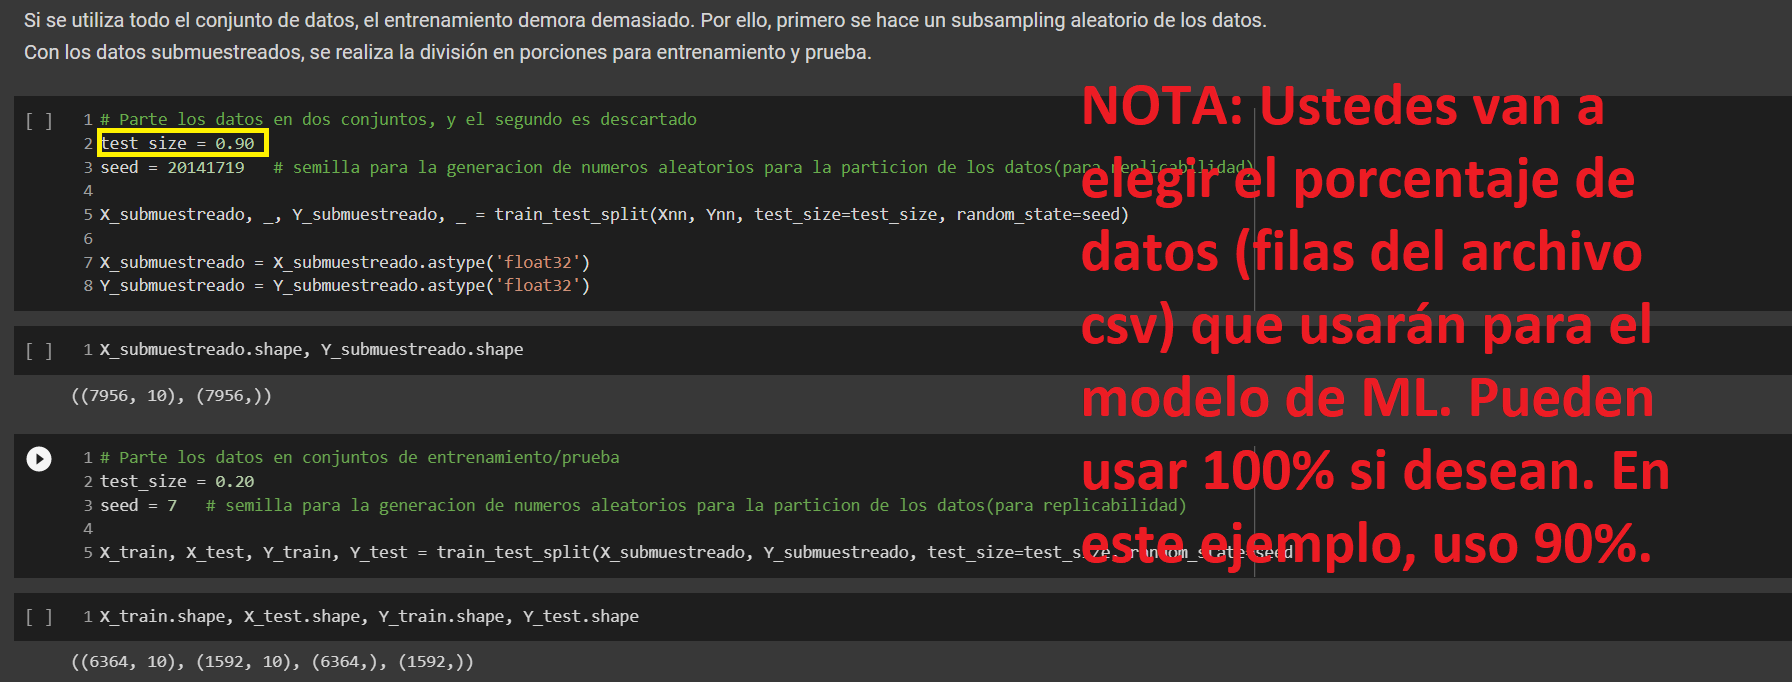

In [56]:
# Convierte la variable clase de datos de entrenamiento en 5 variables one hot encoding (para la red neuronal)

# Esto sería necesario para trabajar con una NN, pero usaré un multiclass basado en árboles
Ytrain_dummy = np_utils.to_categorical(Y_train)
Ytest_dummy = np_utils.to_categorical(Y_test)

In [54]:
Y_train.shape, Y_test.shape

((57365,), (14342,))

In [55]:
Ytrain_dummy.shape, Ytest_dummy.shape

((57365, 5), (14342, 5))

### 2.3) Entrenar y evaluar modelos

- Utilizaré un modelo simple "Decision Tree Classifier" por las siguientes razones:
    - Al ser un arbol, no es necesario realizar un escalamiento de las variables
    - Es un modelo simple que se entrena rápido
    - Cuenta con los métodos de "fit" y "predict" que facilitan su implementación
    
- En caso su performance no sea buena, probaré con otros modelos

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [83]:
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)

cl_report_train = classification_report(Y_train, Y_train_pred)
cl_report_test = classification_report(Y_test, Y_test_pred)

cm_train = confusion_matrix(Y_train, Y_train_pred)
cm_test = confusion_matrix(Y_test, Y_test_pred)


print(f'Accuracy Score Train: {acc_train:.02f}')
print(f'Accuracy Score Test: {acc_test:.02f}')
print(f'\n\nConfussion Matrix Train:\n {cm_train}')
print(f'\nConfussion Matrix Test:\n {cm_test}')
print(f'\n\nReport Train:\n {cl_report_train}')
print(f'\nReport Test:\n {cl_report_test}')

Accuracy Score Train: 0.99
Accuracy Score Test: 0.97


Confussion Matrix Train:
 [[ 6531    13     7    15     0]
 [  142 14609     0     2     0]
 [   13     4 11714     0     0]
 [  131    18     0 14394     0]
 [    0     0     0     0  9772]]

Confussion Matrix Test:
 [[1612   23   16   15   12]
 [  42 3503   13   43   15]
 [   5   12 2904   15    9]
 [  56   33   13 3502    9]
 [  15   19   10   23 2423]]


Report Train:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      6566
         1.0       1.00      0.99      0.99     14753
         2.0       1.00      1.00      1.00     11731
         3.0       1.00      0.99      0.99     14543
         4.0       1.00      1.00      1.00      9772

    accuracy                           0.99     57365
   macro avg       0.99      0.99      0.99     57365
weighted avg       0.99      0.99      0.99     57365


Report Test:
               precision    recall  f1-score   support

         0

- Por lo visto, el performance del modelo es bastante bueno en cada uno de los movimientos. Si bien hay una ligera reducción de accuracy entre el train y el test, los resultados son suficientemente buenos.
- El modelo puede replicar las acciones de quienes crearon la data

In [68]:
features = list(X_train)

In [76]:
df_imp = pandas.DataFrame([features, model.feature_importances_], index=['feature','importance']).T
df_imp.sort_values('importance', ascending=False)

,feature,importance
8,score,0.295119
0,g1x,0.121899
2,g2x,0.111502
1,g1y,0.104016
3,g2y,0.099401
6,dist_caps,0.089882
5,dist_ghost,0.086402
7,dist_5dots,0.064512
9,scared,0.020181
4,caps,0.007084


- Se observa que el componente que brinda más peso al modelo es el score, mientras que vemos que la cercanía a los fantasmas y si están asustados tienen una importancia mucho menor

## 2.4) Seleccionar  modelo y reentrenar

He aplicado validación cruzada para determinar el mejor algoritmo y entrenar el modelo, pero ustedes pueden proponer el algoritmo que deseen.

> __MODELO ELEGIDO: DecisionTreeClassifier en su estado base__
>
> Se observó que el modelo base de un DecisionTreeClassifier performaba relativamente bien, por lo que procederemos a utilizar dicho modelo. Parte del porqué de la buena precisión del modelo se basa en que usamos casi toda la data disponible para el entrenamiento. Los modelos basados en árboles performan mejor cuanto más data hay.

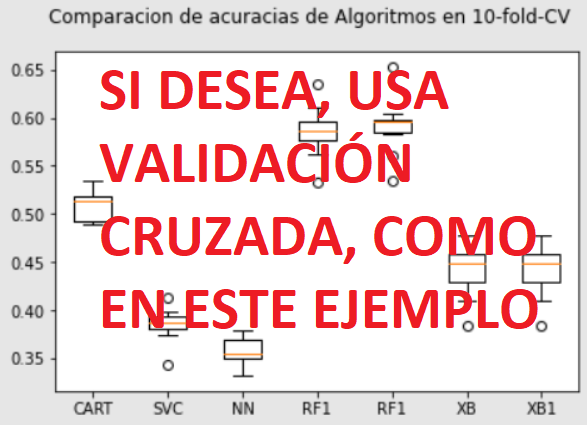

Para los resultados que obtuve, el modelo que obtiene los mejores datos, considerando una menor dispersión de los mismos, es `RF1`.

In [79]:
dataset.shape

(72432, 11)

In [ ]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
#model = DecisionTreeClassifier()
model = RandomForestClassifier(criterion = 'entropy')
model.fit(X_train, Y_train)

### 2.5) Probar modelo en datos de prueba

> Las pruebas se realizaron también celdas arriba

In [84]:
Y_test_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Accuracy score: 0.9722493376098174
[[1612   23   16   15   12]
 [  42 3503   13   43   15]
 [   5   12 2904   15    9]
 [  56   33   13 3502    9]
 [  15   19   10   23 2423]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1678
         1.0       0.98      0.97      0.97      3616
         2.0       0.98      0.99      0.98      2945
         3.0       0.97      0.97      0.97      3613
         4.0       0.98      0.97      0.98      2490

    accuracy                           0.97     14342
   macro avg       0.97      0.97      0.97     14342
weighted avg       0.97      0.97      0.97     14342



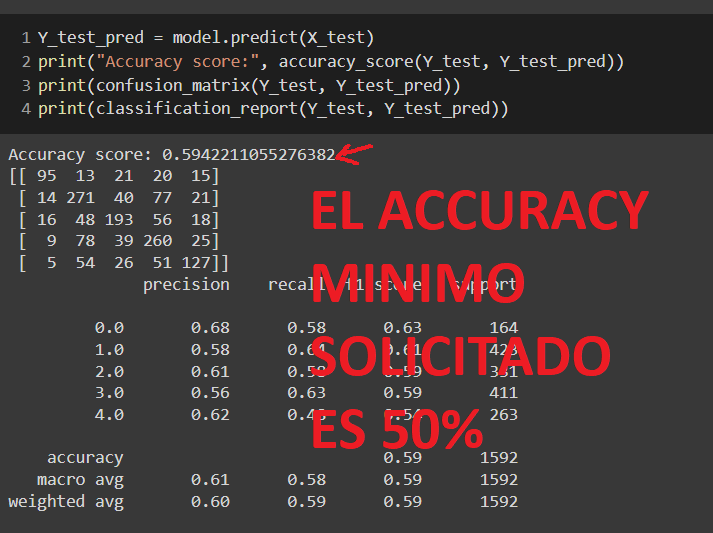

In [85]:
print (Y_test)
print (Y_test_pred)

9100     2.0
68165    1.0
65865    1.0
61773    4.0
47879    0.0
        ... 
26156    1.0
12657    2.0
50612    4.0
31658    3.0
49358    3.0
Name: action, Length: 14342, dtype: float32
[2. 1. 1. ... 0. 3. 3.]


### 2.6) Simulando funcionamiento en entorno de juego (solo una salida)

In [88]:
X_test.values[0].shape

(10,)

In [ ]:
#Las siguientes celdas se podrán ejecutar una vez modificado el código para poder recibir al archivo `datosRecolectadosTotal.csv` y esté preparado para inferir una acción para el entorno Pacman.

In [91]:
print(model.predict(X_test.values[12].reshape(1,-1)))
print(Y_test.values[12])

[3.]
4.0


In [93]:
probas = (model.predict_proba(X_test.values[12].reshape(1,-1)))

In [94]:
probas*100

array([[  0.,   0.,   0., 100.,   0.]])

### 2.7) Grabando el modelo en un archivo externo

In [95]:
model

DecisionTreeClassifier()

In [96]:
# open a file, where you ant to store the data
archivoModelo = open('modeloEntrenado.p', 'wb')

# dump information to that file
pickle.dump(model, archivoModelo)

archivoModelo.close()